<h1> Transform Coding for removing Redundancy </h1>


<h5> Tony David Sprotte, Jonas Keegan, Mateusz Torski, Olga Vyshnevetska </h5>

<h2> 2.1 Determine the RD Curves for the MST  </h2>

<h4> The quantization steps used are 8, 16, 32, 64, 132, 256, 512, 1024, 2048 and 4096. The audio file is "AviadorDro_LaZonaFantasma_8000Hz.oga" which has a high bitrate by default.</h4>

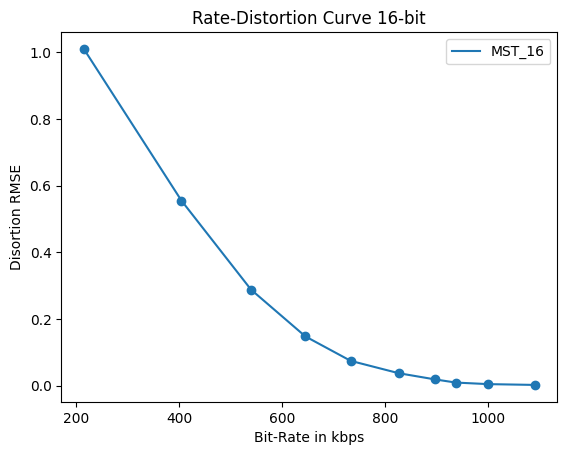

In [5]:
import matplotlib.pyplot as plt

x=[1090.64,1000.68,937.44,897.6,826.68,733.12,645.12,539.53,404.33,214.67]
y=[0.002237,0.004606,0.009296,0.0186,0.03729,0.0744,0.1477,0.288,0.555,1.01]

plt.plot(x,y, label="MST_16")
plt.scatter(x,y)
plt.xlabel("Bit-Rate in kbps")
plt.ylabel("Disortion RMSE")
plt.title("Rate-Distortion Curve 16-bit")
plt.legend()
plt.show()

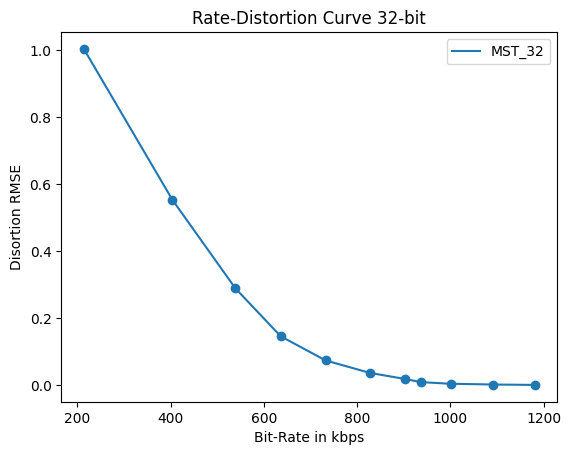

In [6]:
x=[1180.56,1091.64,1000.04,937.42,903.32,827.04,732.52,636.2,539.067,404,214.2]
y=[0.00107,0.00225,0.00458,0.0093,0.0186,0.037,0.074,0.146,0.289,0.553,1.0029]

plt.plot(x,y, label="MST_32")
plt.scatter(x,y)
plt.xlabel("Bit-Rate in kbps")
plt.ylabel("Disortion RMSE")
plt.title("Rate-Distortion Curve 32-bit")
plt.legend()
plt.show()

<h3> Comparison between 32 and 16-bit: </h3>

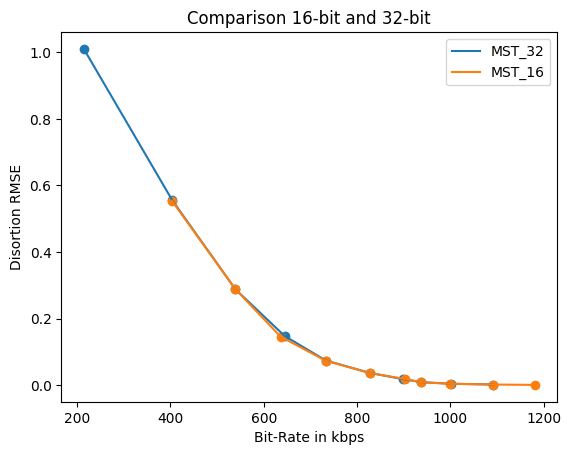

In [7]:
x1=[1090.64,1000.68,937.44,897.6,826.68,733.12,645.12,539.53,404.33,214.67]
y1=[0.002237,0.004606,0.009296,0.0186,0.03729,0.0744,0.1477,0.288,0.555,1.01]

x2=[1180.56,1091.64,1000.04,937.42,903.32,827.04,732.52,636.2,539.067,404]
y2=[0.00107,0.00225,0.00458,0.0093,0.0186,0.037,0.074,0.146,0.289,0.553]
plt.plot(x1,y1, label="MST_32")
plt.plot(x2,y2, label="MST_16")
plt.scatter(x1,y1)
plt.scatter(x2,y2)

plt.xlabel("Bit-Rate in kbps")
plt.ylabel("Disortion RMSE")
plt.title("Comparison 16-bit and 32-bit")
plt.legend()
plt.show()

<p> The curves are very similar, but the 32-bit is <b> shifted </b> to the right. Hypothesis: 32-bit and 16-bit diverge by the factor 2 and the MST_16 curve simply has one more quantization step; both go from 8 until 4096 but one already has <b> half the amount of bits </b> than the other (MST_16).</p>

<h2> 2.2 Determine the RD curves for the DWT </h2>

<h3> First we will use temporal_no_overlapped_DWT_coding.py and try it with two different levels (l) of the DWT, as this has an impact on the energy concentration.Then we will use the default of three levels and change the wavelet name, therefore change the filter used </h3>

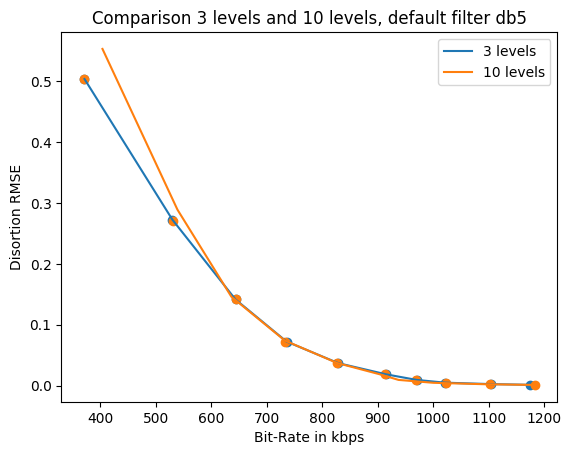

In [16]:
x3=[1173.5,1104.2,1021.47,969.93,914.87,829.0,735.6,643.73, 530.06,371.6]
y3=[0.00127,0.002429,0.00477,0.0093,0.0185,0.0368,0.07233,0.1414, 0.2724,0.5036]

x10=[1182.8,1102.3,1022.27,969.53,913.47,826.27,733.4,644.13,531.4,370.4]
y10=[0.00127,0.0024,0.0047,0.00934,0.0185,0.0367,0.072,0.1418,0.27,0.5038]

plt.plot(x3,y3, label="3 levels")
plt.plot(x2,y2, label="10 levels")
plt.scatter(x3,y3)
plt.scatter(x10,y10)
plt.xlabel("Bit-Rate in kbps")
plt.ylabel("Disortion RMSE")
plt.title("Comparison 3 levels and 10 levels, default filter db5")
plt.legend()
plt.show()

<p> We can see that there is <b> no </b> significant difference between the levels. This makes sense as the layers are all about energy concentration in the bands after each step of the filter cascade but <b> not about distortion </b> --> more levels do not lower distortion. </p>

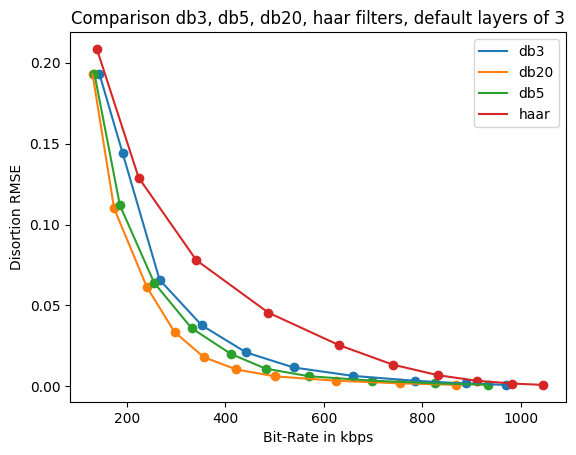

In [11]:
xdb5=[932.2,826.067,698.2,569.2,481.67,411.67,331.4,255.53,186,134.4]
ydb5=[0.001,0.00188,0.003557,0.0063,0.011,0.02,0.036,0.064,0.1119,0.193]

xdb20=[867.53,754.06,625.467,501.467,422.267,356.73,296.93,240.53,174.2,130.533]
ydb20=[0.001,0.0019,0.0035,0.00618,0.01048,0.018,0.03356,0.0615,0.11,0.19295]

xdb3=[968.93,887.53,784.27,659.27,538.467,442.13,352.267,266.53,191.666,144.2]
ydb3=[0.00095,0.0018,0.00347,0.0065,0.0117,0.021,0.0377,0.06587,0.144,0.1933]

xhaar=[1045.73,982.67,910.33,832.133,739.33,629.93,487.13,341.067,224,139.2]
yhaar=[0.00092,0.00178,0.0035,0.00689,0.0135,0.0256,0.0456,0.078,0.129,0.2085]

plt.plot(xdb3,ydb3, label="db3")
plt.plot(xdb20,ydb20, label="db20")
plt.plot(xdb5,ydb5, label="db5")
plt.plot(xhaar,yhaar, label="haar")
plt.scatter(xdb3,ydb3)
plt.scatter(xdb20,ydb20)
plt.scatter(xdb5,ydb5)
plt.scatter(xhaar,yhaar)
plt.xlabel("Bit-Rate in kbps")
plt.ylabel("Disortion RMSE")
plt.title("Comparison db3, db5, db20, haar filters, default layers of 3")
plt.legend()
plt.show()

<p> It is obvious that the filter quality has an impact on the distortion. The better a filter is, the lower the distortion for a bitrate is, as the borders of a filter are more distinct and efficient. Therefore, the ranking in the filters observed is: <b> 4. haar, 3. db3, 2. db5, 1.db20.</b> db20 is the best but also the most complex filter that takes more computing but offers better filtering capabilities. </p>

<h2> 2.3 Determine the RD curves for the overlapped DWT </h2>

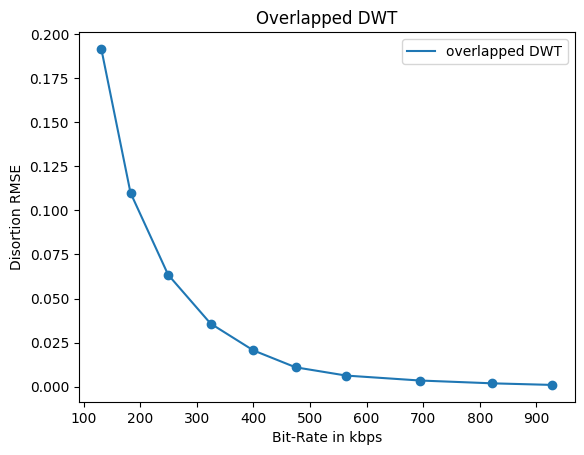

In [12]:
x=[927.8,822,694.2,563.87,474.4,399.8,324.33,249.33,182.867,131.33]
y=[0.001,0.0019,0.0035,0.0063,0.011,0.0206,0.0358,0.0635,0.11,0.1916]

plt.plot(x,y, label="overlapped DWT")
plt.scatter(x,y)
plt.xlabel("Bit-Rate in kbps")
plt.ylabel("Disortion RMSE")
plt.title("Overlapped DWT")
plt.legend()
plt.show()

<h3> Comparison of all RD curves </h2>

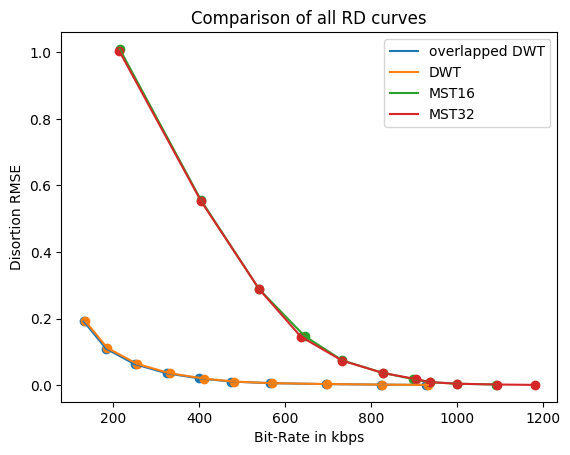

In [13]:
xOverlappedDWT=[927.8,822,694.2,563.87,474.4,399.8,324.33,249.33,182.867,131.33]
yOverlappedDWT=[0.001,0.0019,0.0035,0.0063,0.011,0.0206,0.0358,0.0635,0.11,0.1916]
plt.plot(xOverlappedDWT,yOverlappedDWT, label="overlapped DWT")
plt.scatter(xOverlappedDWT,yOverlappedDWT)

xDWT=[932.2,826.067,698.2,569.2,481.67,411.67,331.4,255.53,186,134.4]
yDWT=[0.001,0.00188,0.003557,0.0063,0.011,0.02,0.036,0.064,0.1119,0.193]
plt.plot(xDWT,yDWT, label="DWT")
plt.scatter(xDWT,yDWT)

xMST16=[1090.64,1000.68,937.44,897.6,826.68,733.12,645.12,539.53,404.33,214.67]
yMST16=[0.002237,0.004606,0.009296,0.0186,0.03729,0.0744,0.1477,0.288,0.555,1.01]
plt.plot(xMST16,yMST16, label="MST16")
plt.scatter(xMST16,yMST16)

xMST32=[1180.56,1091.64,1000.04,937.42,903.32,827.04,732.52,636.2,539.067,404,214.2]
yMST32=[0.00107,0.00225,0.00458,0.0093,0.0186,0.037,0.074,0.146,0.289,0.553,1.0029]
plt.plot(xMST32,yMST32, label="MST32")
plt.scatter(xMST32,yMST32)


plt.xlabel("Bit-Rate in kbps")
plt.ylabel("Disortion RMSE")
plt.title("Comparison of all RD curves")
plt.legend()
plt.show()

<p> We can see that the best encoding is done through the choise of a <b> DWT and not an MST </b> as there is a lot less distortion in lower bit-rates. In higher bit-rates surpassing 900 kbps it does not really matter but for anything lower it really makes a difference. The <b> overlapped DWT naturally is better than the normal DWT </b> but the difference is difficult to notice in this chart, as it is fairly small. After all, the overlap only takes place on a part of the beginning and end of each chunk. </p>

<h2> 2.4 The gain of the filters </h2>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

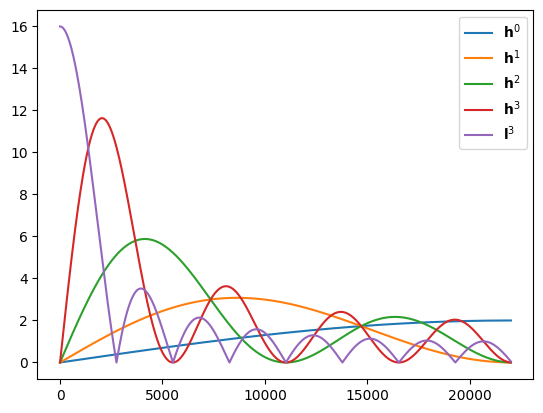

In [14]:
import pywt # pip install pywavelets
from IPython.display import Math
from scipy import signal
import numpy as np

def average_complex_energy(x):
    return np.sum(x.real.astype(np.double)*x.real.astype(np.double) +
                  x.imag.astype(np.double)*x.imag.astype(np.double))/len(x)

%matplotlib inline

filters_name = "haar"
#filters_name = "db5"
#filters_name = "db7"
#filters_name = "db11"
#filters_name = "db20"
#filters_name = "bior3.5"

wavelet = pywt.Wavelet(filters_name)

N_levels = 4

for l in range(N_levels):
    filters = wavelet.wavefun(level = (l+1))[:-1]
    w0, h0 = signal.freqz(filters[0], fs=44100)
    w1, h1 = signal.freqz(filters[1], fs=44100)
    plt.plot(w1, abs(h1), label

="$\\mathbf{h}$" + f"$^{l}$")
    display(Math("\\text{Average energy of}~" + "\mathbf{h}" + f"^{l}" + f" = {average_complex_energy(h1)}"))
plt.plot(w0, abs(h0), label="$\\mathbf{l}$" + f"$^{l}$")
display(Math("\\text{Average energy of}~" + "\mathbf{l}" + f"^{l}" + f" = {average_complex_energy(h0)}"))
plt.legend(loc="best")
plt.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

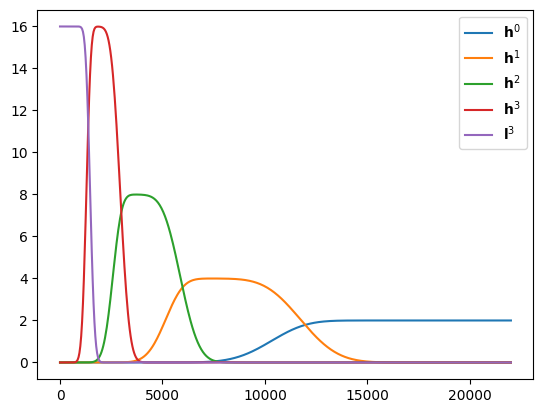

In [15]:
import pywt # pip install pywavelets
from IPython.display import Math
from scipy import signal
import numpy as np

def average_complex_energy(x):
    return np.sum(x.real.astype(np.double)*x.real.astype(np.double) +
                  x.imag.astype(np.double)*x.imag.astype(np.double))/len(x)

%matplotlib inline

#filters_name = "haar"
#filters_name = "db5"
#filters_name = "db7"
#filters_name = "db11"
filters_name = "db20"
#filters_name = "bior3.5"

wavelet = pywt.Wavelet(filters_name)

N_levels = 4

for l in range(N_levels):
    filters = wavelet.wavefun(level = (l+1))[:-1]
    w0, h0 = signal.freqz(filters[0], fs=44100)
    w1, h1 = signal.freqz(filters[1], fs=44100)
    plt.plot(w1, abs(h1), label

="$\\mathbf{h}$" + f"$^{l}$")
    display(Math("\\text{Average energy of}~" + "\mathbf{h}" + f"^{l}" + f" = {average_complex_energy(h1)}"))
plt.plot(w0, abs(h0), label="$\\mathbf{l}$" + f"$^{l}$")
display(Math("\\text{Average energy of}~" + "\mathbf{l}" + f"^{l}" + f" = {average_complex_energy(h0)}"))
plt.legend(loc="best")
plt.show()

<p> The gain of the filter depends on the filter chosen. With a db20 of 4 layers it is fairly easy, as it is a <b> dyadic implementation </b>: the lowest subband exists after 4 splits and therefore the gain of l3 for example is <b> 2⁴ -> 16. </b> h0 on the other hand is the high-pass subband after the first DWT application in the cascade. The original signal is halvened and therefore the gain is 1/(1/2) = 2¹ = 2. As the steps follow the powers of 2, <b> the gain of the filters grows exponentially </b> from each cascade level to the next. </p>
<p> The haar-filter works a lot differently than db20, as it seems like the <b> gains of the subbands are periodic. </b> If one pretends that theres a periodicity behind the graphs, one sees the following pattern and counts the local maxima: h0 has 1/2, h1 has 1, h2 has 2, h3 has 4, l3 has 8. It can be expected that the gain in a haar filter also has <b> some kind of exponential growth </b> with increasing numbers of levels. </p>

<h2> 2.4 Does chunk overlapping in DWT increase overall latency and jitter? </h2>
<p> Chunk overlapping is a technique to avoid signal discontinuities between chunks. It works by <b> reconstructing the beginning and end of a chunk </b> with data from the end of the previous chunk and the beginning of the following chunk. Therefore, at the time of the reconstruction we need the data of the previous chunk which is already there but also the one from the next chunk. For this, we might wait, <b> increasing the latency by exactly the time the chunk takes to arrive </b> at our machine (propagation time and latency of a link). The jitter obviously <b> does not increase </b> because the overall increase in latency by exactly one chunk time is constant.<p>

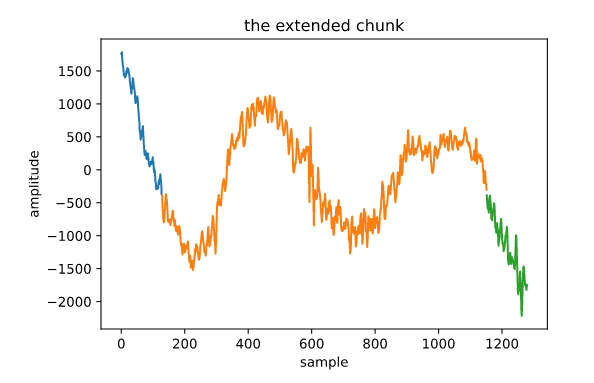

<h2> 2.4 Other transforms in audio encoding systems (such as MP3) exploiting temporal redundancy </h2>

<p> In MP2, the <b> discrete cosine transform DCT </b> is used, which is based on the discrete Fourier transform DFT, but uses only real numbers. In MP2, also <b> Motion Vector Estimation </b> is used, where adjacent frames are analyzed to generate trends. MP2 is also an example for the application of <b> Sub-band Coding (SBC) </b> </p>

<p> Encoding-wise, MP3 can be seen as more sophisticated in comparison with MP2, although they share many transforms. MP3 also makes use of the DCT, but in a modified version; it is therefore called the <b> modified discrete cosine transform MDCT </b>. After the application of the first MDCT in MP3, the fast Fourier transform FFT is used as well. </p>
<p> MDCT is one of the widely spread transforms since its proposal by Nasir Ahmed in 1972 and can not only be found in MP3, but also AAC, Ogg, Opus, DAB+ and many more, even in graphics like JPEG and HEIF. <p>

<h2> 2.5 Visualize </h2>

Visualization @400Hz
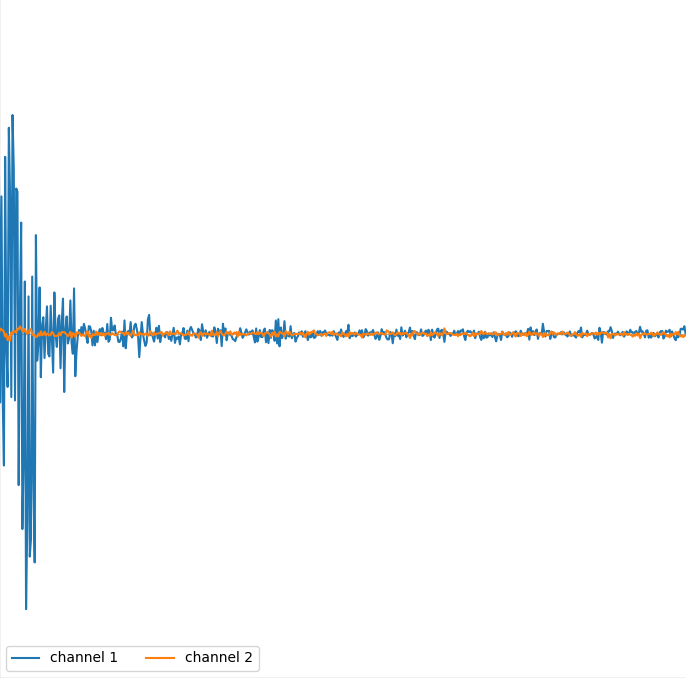

Visualization @2000Hz
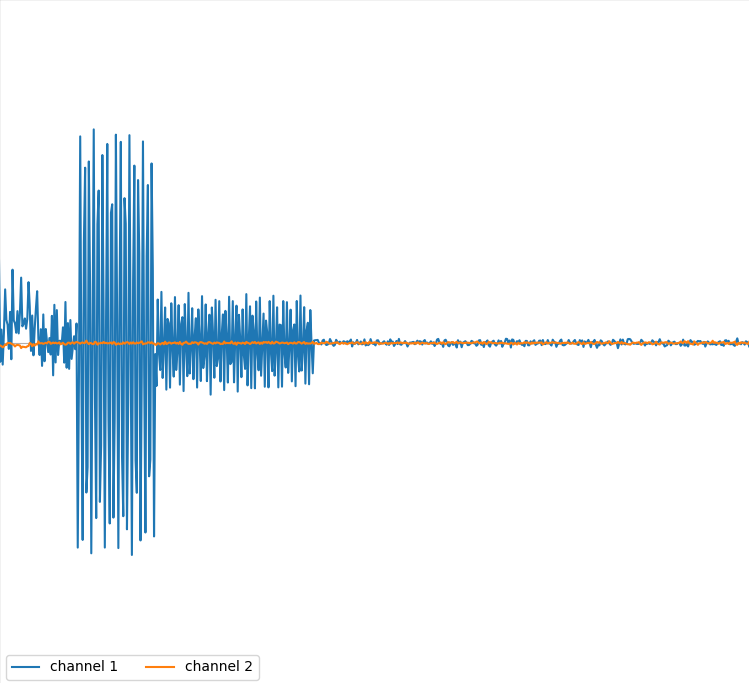

<p> In the first visualization there's only the sine at 440Hz playing and one can see the highest amplitude in the lowest frequencies (probably at around 440Hz). The screenshot is obviously missing the periodic waveform visible in the pyplot GUI window. As an additional step we also chose to visualize a sound of 2000Hz to verify if the previous visualization was correct. Indeed, in the <b> 2000Hz the concentration shifts to the right and therefore, to higher frequencies </b>. Therefore the energy distribution differs to the 400Hz and there are also frequency intervals reached that weren't reached by the 400Hz with any overtones/upper partials. </p>